In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [3]:
#load data from pkl files
def data_load(code = 0):
    return pd.read_pickle('event_'+str(code)+'_data.pkl')
#load data from all dataset
data_modified = pd.read_csv('dataset_modified.csv')
data_modified = data_modified.drop('Unnamed: 0',axis = 1)

In [4]:
data_modified

,date,time,type,state,location,BE
0,02/02/2009,07:15:17,M35,ON,R1_Bed_to_Toilet,begin
1,02/02/2009,07:15:21,AD1-A,2.82231,NaN,NaN
2,02/02/2009,07:15:23,M35,OFF,NaN,NaN
3,02/02/2009,07:15:23,M35,ON,NaN,NaN
4,02/02/2009,07:15:28,AD1-A,2.79926,NaN,NaN
...,...,...,...,...,...,...
137869,04/04/2009,07:26:16,M48,OFF,NaN,NaN
137870,04/04/2009,07:27:47,M48,ON,NaN,NaN
137871,04/04/2009,07:27:50,M47,ON,NaN,NaN
137872,04/04/2009,07:27:59,M47,OFF,NaN,NaN


In [5]:
data_temp = data_modified.loc[data_modified['BE'].str.contains('begin').fillna(False)]
data_temp['location'].value_counts()

Meal_Preparation       117
R1_Bed_to_Toilet        60
R1_Work                 58
R1_Personal_Hygiene     45
R2_Work                 42
R2_Bed_to_Toilet        39
R2_Personal_Hygiene     39
R1_Sleep                35
R2_Sleep                35
Watch_TV                31
Study                    9
Clean                    2
Wash_Bathtub             1
Name: location, dtype: int64

In [6]:
data_temp_list = data_temp['date'].unique()
list = []
for i in data_temp_list:
    list.append(data_temp.loc[data_temp['date'].str.contains(i)]['location'].value_counts())

In [7]:
date_list = []
for i in range(len(data_temp_list)):
    date_list.append(dt.datetime.strptime(data_temp_list[i], "%d/%m/%Y").date())
    pass

In [8]:
df = pd.concat(list,axis=1)
df.columns = date_list
df = df.fillna(0)
df = df.transpose()
df_col = df.columns

In [9]:
import july
from july.utils import date_range
dates = date_range("2009-02-02", "2009-4-4")

In [10]:
code = 5

data_x = df[df_col[code]].index
data_y = df[df_col[code]]
data_t = df_col[code]
data_t

'R2_Bed_to_Toilet'

<AxesSubplot:title={'center':'April'}>

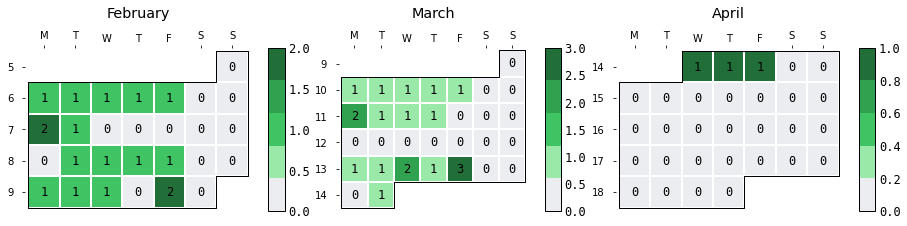

In [11]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
july.month_plot(data_x,data_y,month=2,value_label=True,colorbar=True,cmap='github',ax=axs[0])
july.month_plot(data_x,data_y,month=3,value_label=True,colorbar=True,cmap='github',ax=axs[1])
july.month_plot(data_x,data_y,month=4,value_label=True,colorbar=True,cmap='github',ax=axs[2])

<AxesSubplot:title={'center':'February'}>

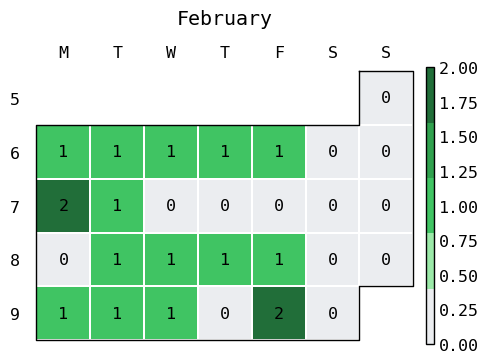

In [12]:
july.month_plot(data_x,data_y,month=2,value_label=True,colorbar=True,cmap='github')

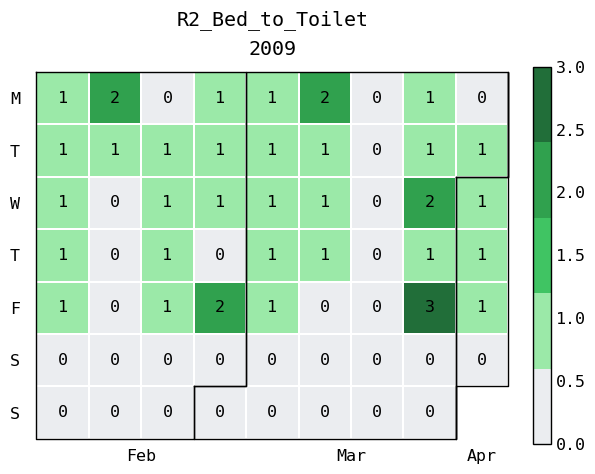

In [13]:
july.heatmap(data_x,data_y, title=data_t, cmap="github",value_label=True,colorbar=True,month_grid=True)
plt.savefig('july.svg')

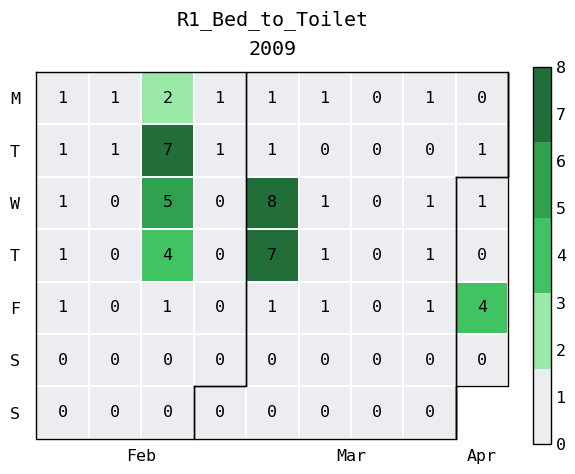

In [20]:
import july
from july.utils import date_range
dates = date_range("2009-02-02", "2009-4-4")

code = 3

data_x = df[df_col[code]].index
data_y = df[df_col[code]]
data_t = df_col[code]

july.heatmap(data_x,data_y, title=data_t, cmap="github",value_label=True,colorbar=True,month_grid=True)
plt.savefig('july.jpg')

In [76]:
#below are not in general plot

In [79]:
df.to_pickle('freq.pkl')
df.index

Index([2009-02-02, 2009-02-03, 2009-02-04, 2009-02-05, 2009-02-06, 2009-02-09,
       2009-02-10, 2009-02-11, 2009-02-12, 2009-02-13, 2009-02-16, 2009-02-17,
       2009-02-18, 2009-02-19, 2009-02-20, 2009-02-21, 2009-02-23, 2009-02-24,
       2009-02-25, 2009-02-26, 2009-02-27, 2009-02-28, 2009-03-02, 2009-03-03,
       2009-03-04, 2009-03-05, 2009-03-06, 2009-03-09, 2009-03-10, 2009-03-11,
       2009-03-12, 2009-03-13, 2009-03-23, 2009-03-24, 2009-03-25, 2009-03-26,
       2009-03-27, 2009-03-28, 2009-03-30, 2009-03-31, 2009-04-01, 2009-04-02,
       2009-04-03, 2009-04-04],
      dtype='object')

In [74]:
df.loc[:,['R1_Bed_to_Toilet','R1_Sleep']]

,R1_Bed_to_Toilet,R1_Sleep
2009-02-02,1.0,1.0
2009-02-03,1.0,1.0
2009-02-04,1.0,1.0
2009-02-05,1.0,1.0
2009-02-06,1.0,1.0
2009-02-09,1.0,1.0
2009-02-10,1.0,0.0
2009-02-11,0.0,0.0
2009-02-12,0.0,0.0
2009-02-13,0.0,0.0


In [35]:
R1 = ['Meal_Preparation', 'R1_Work','R1_Bed_to_Toilet', 'R1_Personal_Hygiene','Watch_TV', 'R1_Sleep', 'Wash_Bathtub', 'Clean','Study']
df_R1 = df[R1]

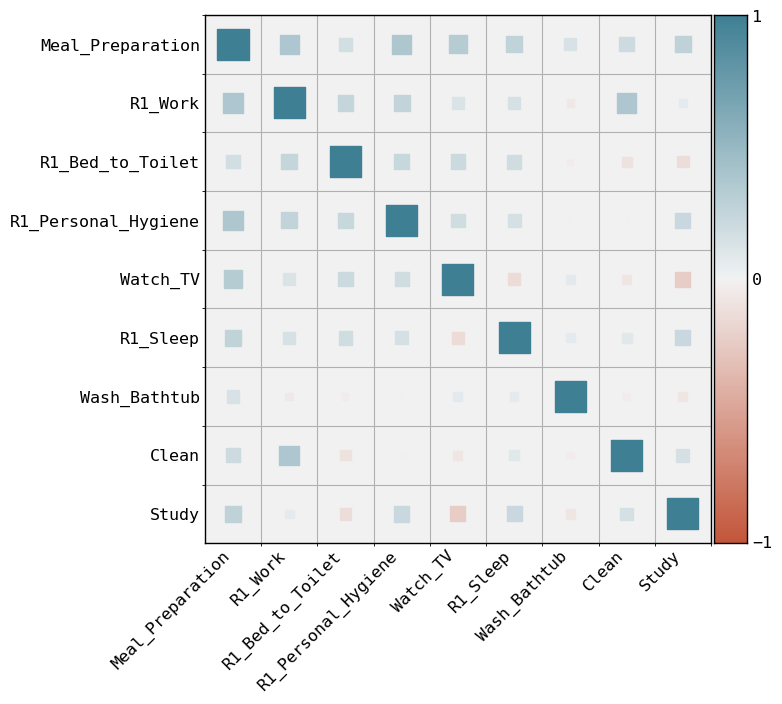

In [46]:
from heatmap import heatmap, corrplot
plt.figure(figsize=(7,7))
corrplot(df_R1.corr())